In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 读取训练集和测试集，观察并合并两集，删去冗余序列

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
full = pd.concat([train, test], ignore_index = True)

C:\Users\zlm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
full.shape

(2919, 81)

In [10]:
full.drop(['Id'], axis = 1, inplace = True)

In [11]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


# 填充缺失数据

In [12]:
missData =full.isnull().sum().sort_values(ascending = False)

In [13]:
missData[missData > 0]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

In [14]:
for col in ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]:
    full[col].fillna("None", inplace=True)

In [15]:
for col in ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]:
    full[col].fillna(full[col].mode()[0], inplace = True)

In [16]:
for col in ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]:
    full[col].fillna(0, inplace = True)

In [17]:
full['LotFrontage'].fillna(full['LotFrontage'].mean(), inplace = True)

In [18]:
missdata2 = full.isnull().sum() > 0

In [19]:
missdata2[missdata2]

SalePrice    True
dtype: bool

# 离散性数据编码，连续性数据归一化

In [20]:
for col in ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]:
    full[col] = full[col].astype(str)

In [21]:
discretedata = full.select_dtypes(['object']) # 选取出离散特征

In [22]:
discretedata.shape

(2919, 55)

In [23]:
ohe = OneHotEncoder()

In [24]:
ohedata = ohe.fit_transform(discretedata).toarray()

In [25]:
ohedata.shape

(2919, 640)

In [26]:
full.drop(full[discretedata.columns.values], axis = 1, inplace = True)

# 特征选择和组合

# 分离特征和标签

In [27]:
full.drop(['SalePrice'], axis = 1, inplace = True)

In [28]:
x = full.loc[:train.shape[0] - 1] 
x = np.concatenate([x.values,ohedata[:x.values.shape[0]]], axis = 1) # 训练集特征

In [29]:
x.shape

(1460, 664)

In [30]:
x_test = full.loc[train.shape[0]:]
x_test = np.concatenate([x_test.values, ohedata[x.shape[0]:]], axis = 1) # 测试集特征

In [31]:
x_test.shape

(1459, 664)

In [32]:
y = train['SalePrice'] #测试集特征

In [33]:
y.shape

(1460,)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

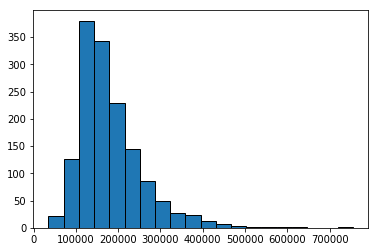

In [34]:
plt.hist(y, bins = 20, edgecolor = 'black')

In [35]:
y_log = np.log(y)

(array([  5.,   0.,   4.,   8.,   8.,  46.,  57., 127., 228., 242., 238.,
        162., 134.,  86.,  61.,  29.,  15.,   4.,   4.,   2.]),
 array([10.46024211, 10.61395365, 10.7676652 , 10.92137675, 11.07508829,
        11.22879984, 11.38251138, 11.53622293, 11.68993448, 11.84364602,
        11.99735757, 12.15106911, 12.30478066, 12.45849221, 12.61220375,
        12.7659153 , 12.91962684, 13.07333839, 13.22704994, 13.38076148,
        13.53447303]),
 <a list of 20 Patch objects>)

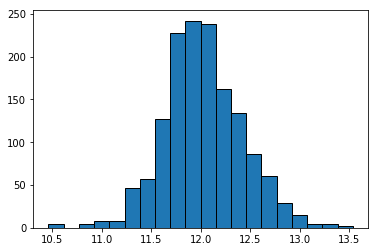

In [36]:
plt.hist(y_log, bins = 20, edgecolor = 'black')

# PCA

In [37]:
from sklearn.decomposition import PCA, KernelPCA

In [38]:
pca = PCA(n_components = 300)

In [39]:
x_pca = pca.fit_transform(x)
x_test_pca = pca.transform(x_test)

In [40]:
x_pca.shape,x_test_pca.shape

((1460, 300), (1459, 300))

# 模型选择

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
reg1 = GradientBoostingRegressor(n_estimators = 100)
reg2 = RandomForestRegressor(n_estimators = 100)
reg3 = XGBRFRegressor(n_estimators = 100)

In [43]:
reg1.fit(x_pca,y_log)
reg2.fit(x_pca,y_log)
reg3.fit(x_pca,y_log)

C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:35:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.8, verbosity=1)

In [44]:
score_GBRT = -cross_val_score(reg1, x_pca, y_log, scoring = 'neg_mean_squared_error', cv = 10)
score_RF = -cross_val_score(reg2, x_pca, y_log, scoring = 'neg_mean_squared_error', cv = 10)
score_XGB = -cross_val_score(reg3, x_pca, y_log, scoring = 'neg_mean_squared_error', cv = 10)

C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\zlm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
np.mean(score_GBRT), np.mean(score_RF), np.mean(score_XGB)

(0.02235650175681808, 0.030011462038862922, 0.15977817024878588)

# 模型调参

## GBRT 

In [81]:
reg1.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [114]:
param_GBRT1 = {'n_estimators' : range(100, 300, 20)}

In [115]:
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_GBRT1, scoring = 'neg_mean_squared_error', cv = 10)

In [116]:
gsearch1.fit(x_pca,y_log)

({'n_estimators': 280}, {'n_estimators': 280})

In [118]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 280}, -0.021680453821749997)

In [120]:
param_GBRT11 = {'n_estimators' : range(280, 400, 20)}

In [121]:
gsearch11 = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_GBRT11, scoring = 'neg_mean_squared_error', cv = 10)

In [123]:
gsearch11.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(280, 400, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [124]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 280}, -0.021680453821749997)

In [125]:
param_GBRT2 = {'max_depth' : range(3, 14, 2), 'min_samples_split' : range(2, 20, 2)}

In [127]:
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280), param_grid = param_GBRT2, scoring = 'neg_mean_squared_error', cv = 10)

In [128]:
gsearch2.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 14, 2), 'min_samples_split': range(2, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [129]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 3, 'min_samples_split': 18}, -0.02134865074997611)

In [138]:
param_GBRT21 = {'max_depth' : [1, 2, 3], 'min_samples_split' : range(20, 110, 10)}

In [139]:
gsearch21 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280), param_grid = param_GBRT21, scoring = 'neg_mean_squared_error', cv = 10)

In [140]:
gsearch21.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3], 'min_samples_split': range(20, 110, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [141]:
gsearch21.best_params_, gsearch21.best_score_

({'max_depth': 3, 'min_samples_split': 100}, -0.020468526472227577)

In [142]:
param_GBRT3 = {'min_samples_split' : range(100, 1050, 50)}

In [143]:
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280, max_depth = 3), param_grid = param_GBRT3, scoring = 'neg_mean_squared_error', cv = 10)

In [144]:
gsearch3.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 1050, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [145]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_split': 100}, -0.02048609969129258)

In [153]:
param_GBRT4 = {'min_samples_split' : range(100, 1050, 50), 'min_samples_leaf' : range(100,1000,100)}

In [154]:
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280, max_depth = 3), param_grid = param_GBRT4, scoring = 'neg_mean_squared_error', cv = 10)

In [155]:
gsearch4.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 1050, 50), 'min_samples_leaf': range(100, 1000, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [156]:
gsearch4.best_params_, gsearch4.best_score_

({'min_samples_leaf': 100, 'min_samples_split': 150}, -0.024566342510081152)

In [48]:
param_GBRT41 = {'min_samples_split' : range(100, 1050, 50), 'min_samples_leaf' : range(1,112,10)}

In [49]:
gsearch41 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280, max_depth = 3), param_grid = param_GBRT41, scoring = 'neg_mean_squared_error', cv = 10)

In [51]:
gsearch41.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 1050, 50), 'min_samples_leaf': range(1, 112, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [52]:
gsearch41.best_params_, gsearch41.best_score_

({'min_samples_leaf': 1, 'min_samples_split': 200}, -0.020570117494678557)

In [54]:
param_GBRT42 = {'min_samples_split' : range(90,205,5)}

In [57]:
gsearch42 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280, max_depth = 3, min_samples_leaf = 1), param_grid = param_GBRT42, scoring = 'neg_mean_squared_error', cv = 10)

In [58]:
gsearch42.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(90, 205, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
gsearch42.best_params_, gsearch42.best_score_

({'min_samples_split': 165}, -0.020217728197841407)

In [61]:
param_GBRT5 = {'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [64]:
gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 280, max_depth = 3, min_samples_leaf = 1, min_samples_split =165), param_grid = param_GBRT5, scoring = 'neg_mean_squared_error', cv = 10)

In [65]:
gsearch5.fit(x_pca,y_log)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [67]:
gsearch5.best_params_, gsearch42.best_score_

({'subsample': 0.8}, -0.020217728197841407)

# 调参后得分

In [71]:
#加倍迭代次数，减少步长，增加泛化能力
reg1_new = GradientBoostingRegressor(n_estimators = 560, max_depth = 3, min_samples_leaf = 1, min_samples_split=165, learning_rate=0.05)

In [77]:
reg1_new.fit(x_pca,y_log)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=165, min_weight_fraction_leaf=0.0,
             n_estimators=560, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
score_reg1_new = -cross_val_score(reg1_new, x_pca, y_log, scoring = 'neg_mean_squared_error', cv = 10)

In [79]:
np.mean(score_reg1_new), np.mean(score_GBRT)

(0.020244813013103817, 0.02235650175681808)

# 提交测试集结果

In [80]:
pred = np.exp(reg1_new.predict(x_test_pca))

In [81]:
result = pd.DataFrame({'Id':test.Id, 'SalePrice':pred})
result.to_csv('submission.csv', index = False)